## Install necessary Libraries 

In [1]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pymysql

In [3]:
%%capture
import sys
!{sys.executable} -m pip install --no-cache-dir --upgrade --force-reinstall pyarrow==14.0.2 pandas==1.5.3 numpy==1.24.4

In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)

## Data Fetching 

Establish a connection to the MySQL and PostgreSQL databases to fetch data.

In [12]:
import os,json 
with open('pwd.json') as f:
    PWD=json.load(f)['PGPASSWORD']
    

In [13]:
import psycopg2

postgre_conn = psycopg2.connect(
    host="truck-delay-postgre.cq3akg8ywjpe.us-east-1.rds.amazonaws.com",
    dbname="TruckdelayDB",
    user="postgres",
    password=PWD,
    port="5432")

In [14]:
import pymysql

mysql_connection = pymysql.connect(
     host = "truck-delay-mysql.cq3akg8ywjpe.us-east-1.rds.amazonaws.com", 
     user = "admin",                       
     password = PWD, 
     database='TruckDB',
    port=3306)


### Retrieve data from the PostgreSQL database

In [16]:
routes_details=pd.read_sql("select * from routes_details",postgre_conn)
routes_details.head(3)

,route_id,origin_id,destination_id,distance,average_hours
0,R-ada2a391,C-927ceb5e,C-56e39a5e,1735.06,34.70
1,R-ae0ef31f,C-927ceb5e,C-73ae5412,1498.24,29.96
2,R-4beec5fd,C-927ceb5e,C-4fe0fa24,6078.46,121.57


In [17]:
routes_weather=pd.read_sql('select * from routes_weather',postgre_conn)
routes_weather.head(3)


,route_id,Date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,R-ada2a391,2019-01-01 00:00:00,30.0,11.0,Heavy snow,0.0,90,1.0,1010,0,0,0,0
1,R-ada2a391,2019-01-01 06:00:00,30.0,11.0,Heavy snow,0.0,91,3.0,1012,0,0,0,0
2,R-ada2a391,2019-01-02 00:00:00,28.0,11.0,Cloudy,0.0,91,4.0,1013,0,0,0,0


### Retrieve data from the MySQL database

In [18]:
city_weather=pd.read_sql('select * from city_weather',mysql_connection)
city_weather.head(3)

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-927ceb5e,2019-01-01,0,30.0,11.0,Light snow,0.0,86,6.0,1019.0,0.0,0.0,0.0,0.0
1,C-927ceb5e,2019-01-01,100,28.0,12.0,Light snow,0.0,86,5.0,1021.0,0.0,0.0,0.0,0.0
2,C-927ceb5e,2019-01-01,200,28.0,13.0,Moderate snow,0.0,85,4.0,1022.0,0.0,0.0,0.0,0.0


In [15]:
drivers_details=pd.read_sql('select * from drivers_details',mysql_connection)
drivers_details.head(3)

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,d9f30553-6,Daniel Marks,male,47,5,proactive,7,42302347,62.22
1,82de7bb8-2,Clifford Carr,male,47,14,proactive,4,27867488,60.89
2,7e789842-4,Terry Faulkner MD,male,41,9,conservative,2,13927774,53.67


In [19]:
traffic_details=pd.read_sql('select * from traffic_details',mysql_connection)
traffic_details.head(3)

,route_id,date,hour,no_of_vehicles,accident
0,R-ada2a391,2019-01-01,0,669.0,0
1,R-ada2a391,2019-01-01,100,628.0,0
2,R-ada2a391,2019-01-01,200,516.0,0


In [20]:
truck_details=pd.read_sql('select * from truck_details',mysql_connection)
truck_details.head(3)

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
0,42302347,10,3000.0,17,gas
1,27867488,14,10000.0,22,diesel
2,13927774,8,10000.0,19,gas


In [21]:
truck_schedule_data=pd.read_sql('select * from truck_schedule_data',mysql_connection)
truck_schedule_data.head(3)

,truck_id,route_id,departure_date,estimated_arrival,delay
0,30312694,R-b236e347,2019-01-01 07:00:00,2019-01-01 13:13:12.,0
1,59856374,R-29ea762e,2019-01-01 07:00:00,2019-01-02 04:01:12.,0
2,12602955,R-a3d67783,2019-01-01 07:00:00,2019-01-01 07:45:36.,0


## Exploratory Data Analysis 

In [22]:
# Converting all date columns of the each dataframe to the 'datetime' object 
city_weather['date']= pd.to_datetime(city_weather['date'])
traffic_details['date']=pd.to_datetime(traffic_details['date'])
truck_schedule_data['estimated_arrival']=pd.to_datetime(truck_schedule_data['estimated_arrival'])
truck_schedule_data['departure_date']=pd.to_datetime(truck_schedule_data['departure_date'])

#### Explore Dataframes 
#### I. Driver's Details Analysis

In [16]:
drivers_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driver_id          1300 non-null   object 
 1   name               1300 non-null   object 
 2   gender             1277 non-null   object 
 3   age                1300 non-null   int64  
 4   experience         1300 non-null   int64  
 5   driving_style      1248 non-null   object 
 6   ratings            1300 non-null   int64  
 7   vehicle_no         1300 non-null   int64  
 8   average_speed_mph  1300 non-null   float64
dtypes: float64(1), int64(4), object(4)
memory usage: 91.5+ KB


In [17]:
drivers_details.describe(include='all')

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
count,1300,1300,1277,1300.000000,1300.000000,1248,1300.000000,1.300000e+03,1300.000000
unique,1300,1274,2,NaN,NaN,2,NaN,NaN,NaN
top,d9f30553-6,Michael Parker,male,NaN,NaN,proactive,NaN,NaN,NaN
freq,1,3,1198,NaN,NaN,648,NaN,NaN,NaN
mean,NaN,NaN,NaN,47.814615,11.988462,NaN,5.633846,3.263242e+07,53.262854
std,NaN,NaN,NaN,4.973240,6.951765,NaN,2.137266,2.205390e+07,8.504282
min,NaN,NaN,NaN,28.000000,-8.000000,NaN,2.000000,1.000839e+07,29.150000
25%,NaN,NaN,NaN,45.000000,7.000000,NaN,4.000000,1.817244e+07,45.427500
50%,NaN,NaN,NaN,48.000000,11.000000,NaN,6.000000,2.584212e+07,57.340000
75%,NaN,NaN,NaN,51.000000,17.000000,NaN,8.000000,3.340052e+07,60.350000


In [18]:
drivers_details.isnull().sum()

driver_id             0
name                  0
gender               23
age                   0
experience            0
driving_style        52
ratings               0
vehicle_no            0
average_speed_mph     0
dtype: int64

Both gender and driving style columns have null values. Those missing values will be imputed or dropped after splitting the datasets for testing, to avoid a potential data leakage. For prelimnary data analysis at this phase those columns will be filled as unknown.

A visual representation of the shape of distribution of numerical columns and the relative density of data at different values is done by plotting a density plot. It is a smooth representation of the distribution of data which is calculated by fitting the probability density function to the histogram of data.


In [23]:
drivers_details['gender'].fillna('unknown',inplace=True)
drivers_details['driving_style'].fillna('unknown',inplace=True)

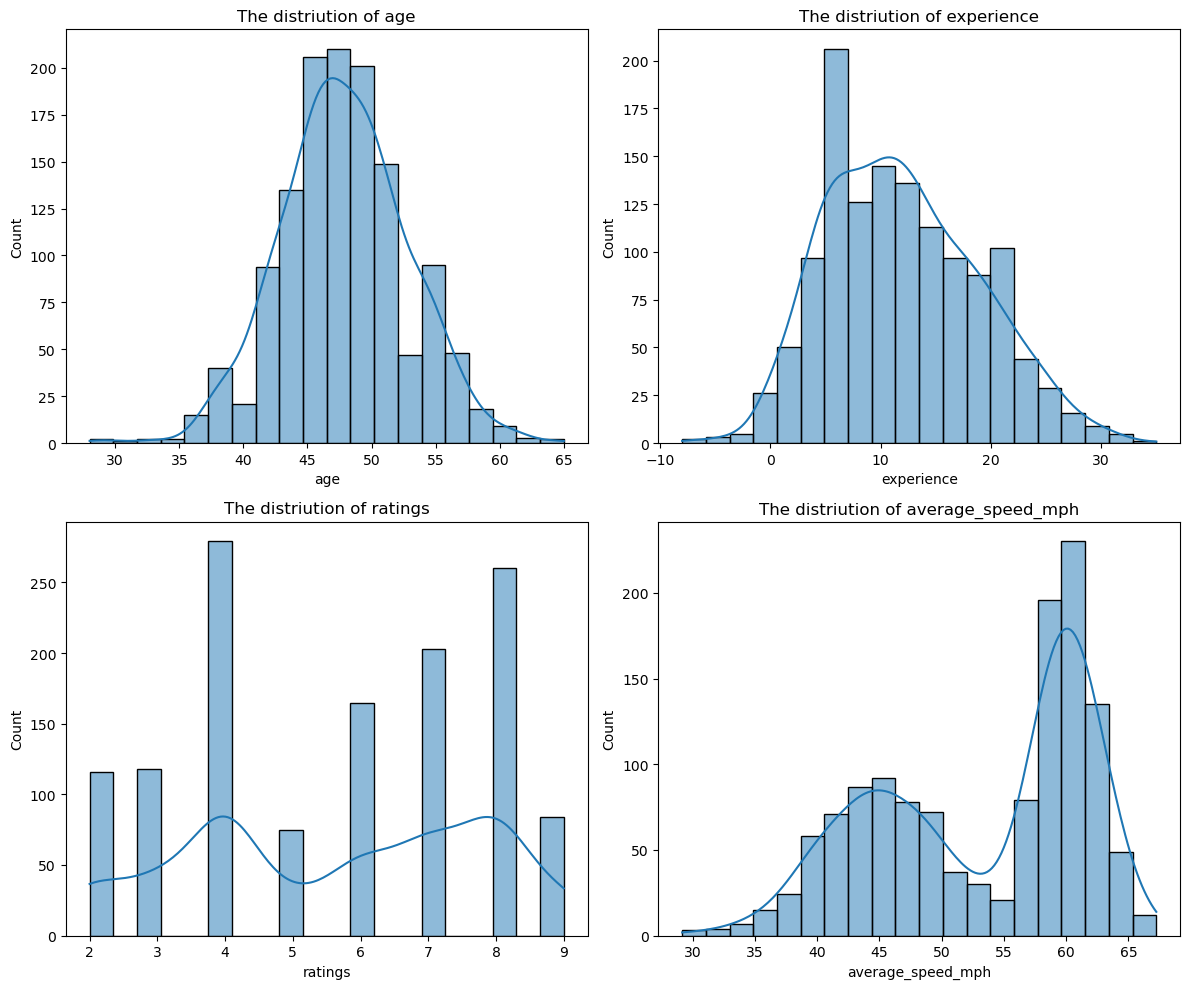

In [20]:
# Plot KDE distribution plots 

num_cols= ['age','experience','ratings','average_speed_mph']
fig,axes=plt.subplots(2,2,figsize=(12, 10))
axes = axes.flat
for ax,col in zip(axes,num_cols): 
    sns.histplot(data=drivers_details,x=col,bins=20,kde=True,ax=ax)
    ax.set_title(f'The distriution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()


The distribution of driver's age is approximately normally dsitributed with most drivers were in the age range of 45-50. 
The distribution of driver's experience is slightly left skewed with most drivers have epxeriences between 5 to 20 years.This suggests although older drivers may have more experience they may be more susceptible to fatigue and health-related conditions. It is important to analyze the relationship between the level of experience and the driving efficiency , so it can recommend to assign routes to drivers based on the experiences, as it could avoid potential delays.implementing appropriate rest policies and providing enough training with proper driving techniques could help imrove the driving efficiency.

There are signinificant number of drivers with low ratings and company should investigate into factors that causes it which may indicate potential driver's poor performance or customer disatisfaction.

The bimodal distribution of average speeds, peaking around 45 and 60 mph, suggests the presence of two distinct groups of drivers with different driving styles.It indicate a split between drivers who adopt a more cautious driving style (lower average speed) and those who adopt a more aggressive driving style (higher average speed) which both are not recommended.The company can consider categorizing drivers based on their average speed behavior and analyze how different driving styles impact ETA, fuel efficiency, and safety.

This can help with training and driving style guidelines for drivers for overall improvemnent in delivery times.

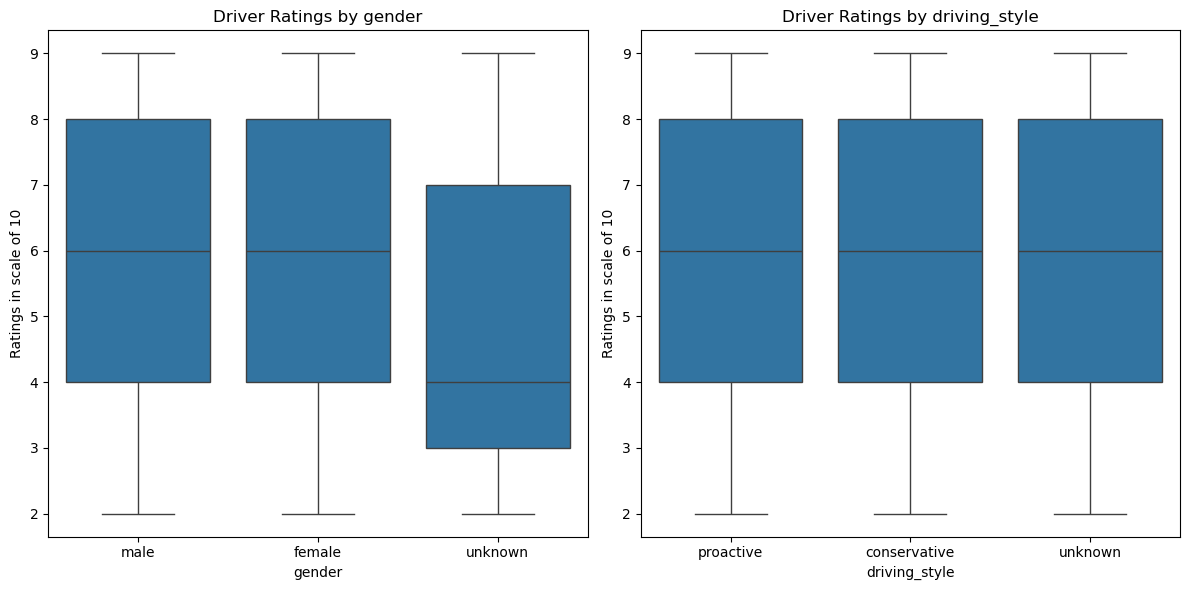

In [21]:
 # Plot boxplots to analyze the relationship between different drivers attributes 
cat_cols=['gender','driving_style']

fig, axes= plt.subplots(1,2,figsize=(12,6))

for i,cat in enumerate(cat_cols): 
    sns.boxplot(x=cat,y='ratings',data=drivers_details,ax=axes.flat[i])
    axes.flat[i].set_title(f'Driver Ratings by {cat}')
    axes.flat[i].set_xlabel(cat)
    axes.flat[i].set_ylabel('Ratings in scale of 10')

plt.tight_layout()
plt.show()


#### II. Truck Details Analysis 

In [22]:
truck_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   truck_id              1300 non-null   int64  
 1   truck_age             1300 non-null   int64  
 2   load_capacity_pounds  1243 non-null   float64
 3   mileage_mpg           1300 non-null   int64  
 4   fuel_type             1300 non-null   object 
dtypes: float64(1), int64(3), object(1)
memory usage: 50.9+ KB


In [23]:
truck_details.isnull().sum()

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

In [24]:
# Replpacing the null values in the load_apacity_pounds column as"unknown'
### truck_details['load_capacity_pounds'].fillna('unknown',inplace=True)

In [25]:
truck_details.describe(include='all')

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
count,1.300000e+03,1300.000000,1243.000000,1300.000000,1300
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,diesel
freq,NaN,NaN,NaN,NaN,692
mean,3.263242e+07,9.513077,8610.619469,20.784615,NaN
std,2.205390e+07,2.039030,5583.759795,3.655876,NaN
min,1.000839e+07,3.000000,3000.000000,11.000000,NaN
25%,1.817244e+07,8.000000,4000.000000,18.000000,NaN
50%,2.584212e+07,10.000000,6000.000000,21.000000,NaN
75%,3.340052e+07,11.000000,15000.000000,24.000000,NaN


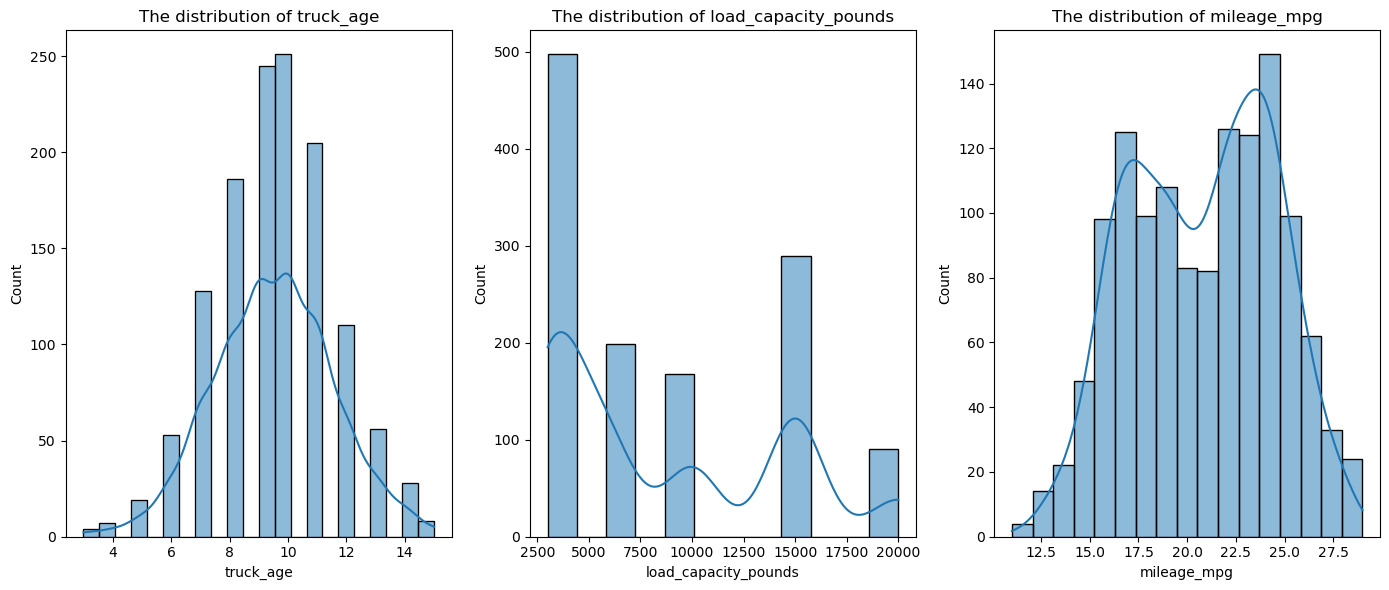

In [26]:
# Visualize the distribution of numerical columns 
num_cols= ['truck_age', 'load_capacity_pounds', 'mileage_mpg']

fig,axes =plt.subplots(1,3,figsize=(14,6))
axes=axes.flat

for ax, col in zip(axes,num_cols):
    sns.histplot(data=truck_details,x=col,ax=ax,kde=True)
    ax.set_title(f'The distribution of {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

The distribution of truck age appears approximately normal, with the majority of trucks falling between 8 and 12 years old.In contrast, vehicle mileage shows a bimodal distribution, indicating two distinct groups: one with lower mileage, likely representing newer trucks, and another with higher mileage, possibly reflecting older or heavily used vehicles.

Analyzing the distribution of truck ages a and fuel efficiency to identify older trucks that might be approaching the end of their useful life and with lower fuel efficiency would help replacing them with more fuel efficient and low mileage models.

In [24]:
truck_details['fuel_type'].value_counts()

diesel    692
gas       568
           40
Name: fuel_type, dtype: int64

There is a unknown category for the fuel type, which must be imputed or dropped later, after data splitting before using this attribute in data analysis. For preliminary analysis, this unknown category will be named as 'unknown'.

In [25]:
truck_details['fuel_type'].unique()

array(['gas', 'diesel', ''], dtype=object)

In [26]:
truck_details['fuel_type']=truck_details['fuel_type'].replace('','unknown')

Looking at the histogram, if 15 mpg was considered as a low mileage threshold, then the distribution of the truck age with their mileage can be analyzed as below.

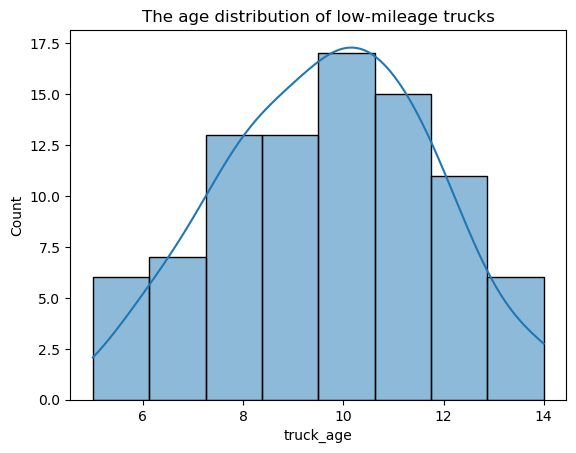

In [30]:
low_mpg_trucks=truck_details[truck_details['mileage_mpg']<=15]

# visualize the Truck ages of low - mileage trucks
sns.histplot(data=low_mpg_trucks,x='truck_age',kde=True)
plt.title('The age distribution of low-mileage trucks')
plt.show()

#### III. Route Data Analysis

In [31]:
routes_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   route_id        2352 non-null   object 
 1   origin_id       2352 non-null   object 
 2   destination_id  2352 non-null   object 
 3   distance        2352 non-null   float64
 4   average_hours   2352 non-null   float64
dtypes: float64(2), object(3)
memory usage: 92.0+ KB


In [32]:
routes_details.describe(include='all')

,route_id,origin_id,destination_id,distance,average_hours
count,2352,2352,2352,2352.000000,2352.000000
unique,2352,49,49,NaN,NaN
top,R-ada2a391,C-927ceb5e,C-56e39a5e,NaN,NaN
freq,1,48,48,NaN,NaN
mean,NaN,NaN,NaN,2376.825230,47.536556
std,NaN,NaN,NaN,2696.904248,53.938045
min,NaN,NaN,NaN,3.900000,0.080000
25%,NaN,NaN,NaN,557.365000,11.147500
50%,NaN,NaN,NaN,1104.825000,22.100000
75%,NaN,NaN,NaN,2516.407500,50.327500


In [33]:
routes_details.isnull().sum()

route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
dtype: int64

#### IV. Traffic Data Analysis 

In [34]:
traffic_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2597913 entries, 0 to 2597912
Data columns (total 5 columns):
 #   Column          Dtype         
---  ------          -----         
 0   route_id        object        
 1   date            datetime64[ns]
 2   hour            int64         
 3   no_of_vehicles  float64       
 4   accident        int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 99.1+ MB


In [35]:
traffic_details.isna().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

There are 1152 missing values for the number of trucks column.

In [36]:
traffic_details.describe()

,hour,no_of_vehicles,accident
count,2.597913e+06,2.596761e+06,2.597913e+06
mean,1.150021e+03,1.566776e+03,5.320848e-02
std,6.922211e+02,8.959424e+02,2.244490e-01
min,0.000000e+00,1.000000e+02,0.000000e+00
25%,6.000000e+02,6.060000e+02,0.000000e+00
50%,1.200000e+03,1.969000e+03,0.000000e+00
75%,1.800000e+03,2.326000e+03,0.000000e+00
max,2.300000e+03,3.636000e+03,1.000000e+00


The hour has integer format of data, but it should be converted to a 24 hour format by padding the integers with zeros to make a 4 digit integer 


In [27]:
# categorizing the traffic hours to difefrent times of the day for further analysis 

def time_category(hour):
    if 300 <= hour < 600 : 
        return "Early morning"
    elif 600 <=hour < 1200:
        return 'Morning'
    elif 1200 <= hour < 1600:
        return 'Noon'
    elif 1600 <= hour < 2000:
        return 'Evening'
    elif 2000 <= hour < 2300:
        return 'Night'
    elif 0 <= hour < 300:
        return 'Night'
        
traffic_details_df = traffic_details.copy()
traffic_details_df['time_category']=traffic_details_df['hour'].apply(time_category)

# Caluclating the volume of traffic during each time-category 
grouped_trucks= traffic_details_df.groupby('time_category')['no_of_vehicles'].mean()
print(f'The average number of trucks during each time category : \n {grouped_trucks}')
print('\n')
grouped_accidents = traffic_details_df.groupby('time_category')['accident'].count()
print(f'Total number of accidents during each time caregory : \n { grouped_accidents}')   

The average number of trucks during each time category : 
 time_category
Early morning     563.030071
Evening          1999.185426
Morning          1735.696694
Night            1263.594675
Noon             1990.786218
Name: no_of_vehicles, dtype: float64


Total number of accidents during each time caregory : 
 time_category
Early morning    324746
Evening          433011
Morning          649457
Night            649473
Noon             432978
Name: accident, dtype: int64


Evening experiences the highest traffic with an average of 2000 vehicles, likely due to rush hour.Morning follows closely with around 1735 vehicles, indicating significant traffic during the morning rush.Early Morning sees the least traffic with around 562 vehicles, as people are still at home or starting their day.
The most accidents were happened during night time with approximate total of 649,473 and closely around the same number of accidents during the morning hours. 

## Creating Feature Store in HopsWork 


### Creating feature groups 
Feature groups are created for each dataframe and are stored in the featire store. when creating them, its necessary to have a event_time created to ensure point in time correct joins for training dataset and enable time-travel capabilities in offline feature store.

In [3]:
%%capture
%pip install -U hopsworks

In [4]:
%%capture
pip install confluent-kafka

In [5]:
%%capture
!{sys.executable} -m pip install --no-cache-dir --upgrade pyarrow==14.0.2 

In [6]:
import pyarrow as pa, pyarrow.flight as fl
import hopsworks

In [5]:
%%capture
import sys

# Uninstall any broken pip installs
!{sys.executable} -m pip uninstall -y confluent-kafka

# Install precompiled Kafka package via Conda
!conda install -y -c conda-forge --prefix {sys.prefix} python-confluent-kafka


In [1]:

import confluent_kafka
print("Confluent Kafka version:", confluent_kafka.__version__)


Confluent Kafka version: 2.11.1


In [7]:
project=hopsworks.login()

2025-09-15 21:26:55,151 INFO: Initializing external client
2025-09-15 21:26:55,152 INFO: Base URL: https://c.app.hopsworks.ai:443




To ensure compatibility please install the latest bug fix release matching the minor version of your backend (4.2) by running 'pip install hopsworks==4.2.*'


2025-09-15 21:26:56,079 INFO: Python Engine initialized.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/1246371


In [8]:
fs=project.get_feature_store()

#### I. Drivers Feature Group 

In [28]:
import pandas as pd
drivers_details['event_time']=pd.Timestamp("now", tz="UTC") #create an event_time 
drivers_details=drivers_details.sort_values(["event_time","driver_id"])

# create feature group for drivers details 
drivers_fg=fs.get_or_create_feature_group(name='drivers_details_fg',
                                          description='details about the driver',
                                          version=3,
                                          primary_key=['driver_id'],
                                          event_time='event_time',
                                          online_enabled=False)

In [29]:
# insert the drivers dataframe into the feature group 
drivers_fg.insert(drivers_details)

Uploading Dataframe: 100.00% |██████████| Rows 1300/1300 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: drivers_details_fg_3_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1246371/jobs/named/drivers_details_fg_3_offline_fg_materialization/executions


(Job('drivers_details_fg_3_offline_fg_materialization', 'SPARK'), None)

In [30]:
# Add feature descriptions for the drivers feature group 

feature_descriptions_drivers = [

    {"name": "driver_id", "description": "unique identification for each driver"},
    {"name": "name", "description": "name of the truck driver"},
    {"name": "gender", "description": "gender of the truck driver"},
    {"name": "age", "description": "age of the truck driver"},
    {"name": "experience", "description": "experience of the truck driver in years"},
    {"name": "driving_style", "description": "driving style of the truck driver, conservative or proactive"},
    {"name": "ratings", "description": "average rating of the truck driver on a scale of 1 to 5"},
    {"name": "vehicle_no", "description": "the number of the driver’s truck"},
    {"name": "average_speed_mph", "description": "average speed of the truck driver in miles per hour"},
    {"name": "event_time", "description": "dummy event time"}]

for desc in feature_descriptions_drivers:
    drivers_fg.update_feature_description(desc["name"], desc["description"])


In [31]:
# Configure statistics for the feature group
drivers_fg.statistics_config = {
    "enabled": True,        # Enable statistics calculation
    "histograms": True,     # Include histograms in the statistics
    "correlations": True    # Include correlations in the statistics
}

# Update the statistics configuration for the feature group
drivers_fg.update_statistics_config()

# Compute statistics for the feature group
drivers_fg.compute_statistics()

Statistics(1757787851468)

#### II. Truck Data Feature Group

In [34]:
# create event time for the truck_details df
truck_details['event_time']=pd.Timestamp("now", tz="UTC")

truck_details=truck_details.sort_values(['event_time','truck_id']) # sort the entries in the order of the time event 

truck_fg = fs.get_or_create_feature_group(
    name="truck_details_fg",          # Name of the feature group
    version=2,                        # Version number
    description="Truck data",         # Description of the feature group
    primary_key=['truck_id'],         # Primary key(s) for the feature group
    event_time='event_time', 
    time_travel_format="HUDI",# Event time column
    online_enabled=False              # Online feature store capability (set to False)
)


In [35]:
truck_fg.insert(truck_details)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1246371/fs/1232967/fg/1513845


Uploading Dataframe: 100.00% |██████████| Rows 1300/1300 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: truck_details_fg_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1246371/jobs/named/truck_details_fg_2_offline_fg_materialization/executions


(Job('truck_details_fg_2_offline_fg_materialization', 'SPARK'), None)

In [36]:
# Add feature descriptions

feature_descriptions_trucks = [
    {"name":'truck_id',"description":"the unique identification number of the truck"},
    {"name":'truck_age',"description":"age of the truck in years"},
    {"name":'load_capacity_pounds',"description":"loading capacity of the truck in years"},
    {"name":'mileage_mpg',"description": "mileage of the truck in miles per gallon"},
    {"name":'fuel_type',"description":"fuel type of the truck"},
    {"name": "event_time", "description": "dummy event time"}

]

for desc in feature_descriptions_trucks:
    truck_fg.update_feature_description(desc["name"], desc["description"])

In [51]:
truck_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

truck_fg.update_statistics_config()
truck_fg.compute_statistics()

Statistics(1757971959818)

### III. Route data feature group 

In [38]:
routes_details['event_time'] = pd.Timestamp("now", tz="UTC")
routes_details=routes_details.sort_values(["event_time","route_id"])

In [39]:
routes_details.columns

Index(['route_id', 'origin_id', 'destination_id', 'distance', 'average_hours',
       'event_time'],
      dtype='object')

In [40]:
# Create feature group for route details
routes_fg = fs.get_or_create_feature_group(
    name="routes_details_fg",         # Name of the feature group
    version=1,                        # Version number
    description="Routes data",        # Description of the feature group
    primary_key=['route_id'],         # Primary key(s) for the feature group
    event_time='event_time',          # Event time column
    online_enabled=False              # Online feature store capability (set to False)
)


In [41]:
routes_fg.insert(routes_details)

Uploading Dataframe: 100.00% |██████████| Rows 2352/2352 | Elapsed Time: 00:00 | Remaining Time: 00:00


Launching job: routes_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1246371/jobs/named/routes_details_fg_1_offline_fg_materialization/executions


(Job('routes_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [44]:
# Add feature descriptions

feature_descriptions_routes = [
    {"name": 'origin_id', "description": "the city identification number for the origin city"},
    {"name": 'destination_id', "description": " the city identification number for the destination"},
    {"name": 'distance', "description": " the distance between the origin and destination cities in miles"},
    {"name": 'average_hours', "description": "average time needed to travel from the origin to the destination in hours"},
    {"name": "event_time", "description": "dummy event time"},
    {"name": 'route_id', "description": "the unique identifier of the routes"}]
for desc in feature_descriptions_routes:
    routes_fg.update_feature_description(desc["name"], desc["description"])

In [45]:
routes_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

routes_fg.update_statistics_config()
routes_fg.compute_statistics()

Statistics(1757788497555)

#### IV. Truck Schedule Data feature store 

In [47]:
truck_schedule_data=truck_schedule_data.sort_values(["estimated_arrival","truck_id"]) #sorting 


# Create  feature group for truck schedule details
truck_schedule_fg = fs.get_or_create_feature_group(
    name="truck_schedule_details_fg",  # Name of the feature group
    version=3,                          # Version number
    description="Truck Schedule data",  # Description of the feature group
    primary_key=['truck_id','route_id'], # Primary key(s) for the feature group
    event_time='estimated_arrival',     # Event time column
    online_enabled=True                  # Online feature store capability (set to True)
)


In [48]:
truck_schedule_fg.insert(truck_schedule_data)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1246371/fs/1232967/fg/1513846


Uploading Dataframe: 100.00% |██████████| Rows 12308/12308 | Elapsed Time: 00:01 | Remaining Time: 00:00


Launching job: truck_schedule_details_fg_3_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1246371/jobs/named/truck_schedule_details_fg_3_offline_fg_materialization/executions


(Job('truck_schedule_details_fg_3_offline_fg_materialization', 'SPARK'), None)

In [49]:
# Add feature descriptions
feature_descriptions_schedule = [
    {"name": 'truck_id', "description": "the unique identifier of the truck"},
    {"name": 'route_id', "description": "the unique identifier of the route"},
    {"name": 'departure_date', "description": "departure DateTime of the truck"},
    {"name": 'estimated_arrival', "description": "estimated arrival DateTime of the truck"},
    {"name": 'delay', "description": "binary variable if the truck’s arrival was delayed, 0 for on-time arrival and 1 for delayed arrival"},
]

for desc in feature_descriptions_schedule:
    truck_schedule_fg.update_feature_description(desc["name"], desc["description"])

In [58]:
truck_schedule_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

truck_schedule_fg.update_statistics_config()
truck_schedule_fg.compute_statistics()

Statistics(1757972064767)

#### V. Traffic feature store 

In [53]:
traffic_details=traffic_details.sort_values(['date','route_id','hour'])

In [54]:
traffic_fg = fs.get_or_create_feature_group(
    name="traffic_details_fg",
    version=2,
    description="Traffic data",
    primary_key=['route_id','hour'],
    event_time='date',
    online_enabled=True
)

In [55]:
traffic_fg.insert(traffic_details)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1246371/fs/1232967/fg/1513847


Uploading Dataframe: 100.00% |██████████| Rows 2597913/2597913 | Elapsed Time: 06:39 | Remaining Time: 00:00


Launching job: traffic_details_fg_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1246371/jobs/named/traffic_details_fg_2_offline_fg_materialization/executions


(Job('traffic_details_fg_2_offline_fg_materialization', 'SPARK'), None)

In [56]:
feature_descriptions_traffic = [
     {"name": 'route_id', "description": "the identification number of the route"},
     {"name": 'date', "description": " date of the traffic observation"},
     {"name": 'hour', "description": "the hour of the observation as a number in 24-hour format"},
     {"name": 'no_of_vehicles', "description": "the number of vehicles observed on the route"},
     {"name": 'accident', "description": "binary variable to denote if an accident was observed"}

]
for desc in feature_descriptions_traffic:
    traffic_fg.update_feature_description(desc["name"], desc["description"])

In [63]:
traffic_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

traffic_fg.update_statistics_config()
traffic_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
http://c.app.hopsworks.ai/p/1246371/jobs/named/traffic_details_fg_2_compute_stats_15092025214405/executions
2025-09-15 21:44:14,338 INFO: Waiting for execution to finish. Current state: INITIALIZING. Final status: UNDEFINED
2025-09-15 21:44:17,402 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-09-15 21:44:20,467 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-09-15 21:45:55,407 INFO: Waiting for execution to finish. Current state: SUCCEEDING. Final status: UNDEFINED
2025-09-15 21:46:01,536 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-09-15 21:46:01,603 INFO: Waiting for log aggregation to finish.
2025-09-15 21:46:09,846 INFO: Execution finished successfully.


Job('traffic_details_fg_2_compute_stats_15092025214405', 'PYSPARK')

#### VI. City weather Feature Store

In [59]:
city_weather=city_weather.sort_values(['date','city_id','hour'])

In [60]:
city_weather_fg = fs.get_or_create_feature_group(
    name="city_weather_details_fg",
    version=2,
    description="City Weather data",
    primary_key=['city_id','hour'],
    event_time='date',
    online_enabled=True
)

In [61]:
city_weather_fg.insert(city_weather)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/1246371/fs/1232967/fg/1513848


Uploading Dataframe: 100.00% |██████████| Rows 55176/55176 | Elapsed Time: 00:19 | Remaining Time: 00:00


Launching job: city_weather_details_fg_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1246371/jobs/named/city_weather_details_fg_2_offline_fg_materialization/executions


(Job('city_weather_details_fg_2_offline_fg_materialization', 'SPARK'), None)

In [62]:
feature_descriptions_weather = [
    {"name": 'city_id', "description":  'the unique identifier of the city'},
    {"name": 'date', "description":  'date of the observation'},
    {"name": 'hour', "description": 'the hour of the observation as a number in 24hour format'},
    {"name": 'temp', "description":  'temperature in Fahrenheit'},
    {"name": 'wind_speed', "description":  'wind speed in miles per hour'},
    {"name": 'description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'precip', "description":  'precipitation in inches'},
    {"name": 'humidity', "description":  'humidity observed'},
    {"name": 'visibility', "description":  'visibility observed in miles per hour'},
    {"name": 'pressure', "description":  'pressure observed in millibar'},
    {"name": 'chanceofrain', "description":  'chances of rain'},
    {"name": 'chanceoffog', "description":  'chances of fog'},
    {"name": 'chanceofsnow', "description":  'chances of snow'},
    {"name": 'chanceofthunder', "description":  'chances of thunder'}

]

for desc in feature_descriptions_weather:
    city_weather_fg.update_feature_description(desc["name"], desc["description"])

In [70]:
city_weather_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

city_weather_fg.update_statistics_config()
city_weather_fg.compute_statistics()

Statistics Job started successfully, you can follow the progress at 
http://c.app.hopsworks.ai/p/1246371/jobs/named/city_weather_details_fg_2_compute_stats_15092025215032/executions
2025-09-15 21:50:41,194 INFO: Waiting for execution to finish. Current state: SUBMITTED. Final status: UNDEFINED
2025-09-15 21:50:47,316 INFO: Waiting for execution to finish. Current state: RUNNING. Final status: UNDEFINED
2025-09-15 21:52:19,151 INFO: Waiting for execution to finish. Current state: AGGREGATING_LOGS. Final status: SUCCEEDED
2025-09-15 21:52:19,197 INFO: Waiting for log aggregation to finish.
2025-09-15 21:52:27,428 INFO: Execution finished successfully.


Job('city_weather_details_fg_2_compute_stats_15092025215032', 'PYSPARK')

#### VII. Route Weather Feature Store 

In [64]:
routes_weather=routes_weather.sort_values(by=['Date','route_id'])

In [67]:
route_weather_fg = fs.get_or_create_feature_group(
    name="route_weather_details_fg",
    version=1,
    description="Route Weather data",
    primary_key=['route_id'],
    event_time='date',
    online_enabled=True
)

In [68]:
route_weather_fg.insert(routes_weather)

Uploading Dataframe: 100.00% |██████████| Rows 425712/425712 | Elapsed Time: 01:59 | Remaining Time: 00:00


Launching job: route_weather_details_fg_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1246371/jobs/named/route_weather_details_fg_1_offline_fg_materialization/executions


(Job('route_weather_details_fg_1_offline_fg_materialization', 'SPARK'), None)

In [69]:
feature_descriptions_route_weather = [

    {"name": 'route_id', "description":  'the unique identifier of the city'},
    {"name": 'date', "description":  'date of the observation'},
    {"name": 'temp', "description":  'temperature in Fahrenheit'},
    {"name": 'wind_speed', "description":  'wind speed in miles per hour'},
    {"name": 'description', "description":  'description of the weather conditions such as Clear, Cloudy, etc'},
    {"name": 'precip', "description":  'precipitation in inches'},
    {"name": 'humidity', "description":  'humidity observed'},
    {"name": 'visibility', "description":  'visibility observed in miles per hour'},
    {"name": 'pressure', "description":  'pressure observed in millibar'},
    {"name": 'chanceofrain', "description":  'chances of rain'},
    {"name": 'chanceoffog', "description":  'chances of fog'},
    {"name": 'chanceofsnow', "description":  'chances of snow'},
    {"name": 'chanceofthunder', "description":  'chances of thunder'}

]

for desc in feature_descriptions_route_weather:
    route_weather_fg.update_feature_description(desc["name"], desc["description"])

In [71]:
route_weather_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

route_weather_fg.update_statistics_config()
route_weather_fg.compute_statistics()

Statistics(1757973098826)

### Fetch data from the Feature Store 

In [72]:
routes_df_fg=fs.get_feature_group('routes_details_fg',version=1)
query=routes_df_fg.select_all()
routes_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.79s) 


In [73]:
route_weather_fg = fs.get_feature_group('route_weather_details_fg', version=1)
query = route_weather_fg.select_all()
route_weather=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (2.95s) 


In [74]:
drivers_df_fg = fs.get_feature_group('drivers_details_fg', version=3)
query = drivers_df_fg.select_all()
drivers_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.48s) 


In [75]:
trucks_df_fg = fs.get_feature_group('truck_details_fg', version=2)
query = trucks_df_fg.select_all()
trucks_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.47s) 


In [76]:
traffic_df_fg = fs.get_feature_group('traffic_details_fg', version=2)
query = traffic_df_fg.select_all()
traffic_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (9.77s) 


In [77]:
schedule_df_fg = fs.get_feature_group('truck_schedule_details_fg', version=3)
query = schedule_df_fg.select_all()
schedule_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.52s) 


In [78]:
weather_df_fg = fs.get_feature_group('city_weather_details_fg', version=2)
query = weather_df_fg.select_all()
weather_df=query.read()

Finished: Reading data from Hopsworks, using Hopsworks Feature Query Service (0.76s) 


## Data Preprocessing

### I. Missing value detection and imputation

In [79]:
# Check drivers_df 
drivers_df.head(1)

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph,event_time
0,6af718cd-c,Steven Carter,male,47,7,conservative,4,99568033,44.26,2025-09-13 18:22:19.234276+00:00


In [80]:
# Drop event_time column from the df as it's not adding important information for the drivers details dataframe
drivers_df.drop(columns='event_time', inplace=True)

In [81]:
# check for null values
drivers_df.isna().sum()

driver_id            0
name                 0
gender               0
age                  0
experience           0
driving_style        0
ratings              0
vehicle_no           0
average_speed_mph    0
dtype: int64

In [82]:
# Check for duplicates in the driver's id column 
drivers_df[drivers_df.duplicated(subset=['driver_id'])]

,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
1300,72e45008-5,Julia Graham,female,50,8,conservative,3,17867711,29.15
1301,9888afbd-f,Jonathan Evans,male,43,12,proactive,6,84896559,59.66
1302,ba620cdc-7,Jerome Walker,male,38,5,proactive,8,33748476,53.58
1303,0803fe44-9,Jason Tucker,male,52,17,proactive,4,24578714,59.99
1304,ee8a6522-b,Nicholas Kerr,male,53,24,proactive,6,30423832,61.13
...,...,...,...,...,...,...,...,...,...
2595,bdf779af-e,Gregory Snyder,male,52,20,conservative,4,31923822,47.57
2596,510e4a9f-b,Colin Lopez,male,49,6,proactive,2,23294840,60.82
2597,ddcaf636-8,Christopher Rubio,male,57,9,proactive,8,31057269,59.95
2598,7e4bb9d1-2,Richard Burton,male,39,4,proactive,3,44329842,57.67


In [83]:
# Check Truck data 
trucks_df.head(1)

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,event_time
0,15302925,7,6000.0,21,diesel,2025-09-15 21:30:56.112407+00:00


In [84]:
# Drop event_time column from the df as it's not adding important information for the Trucks details dataframe
trucks_df.drop(columns='event_time', inplace=True)

In [85]:
#check for null values 
trucks_df.isnull().sum()

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

There are 114 null values for the load_capacit_pounds will be imputed after data splitting. Preliminary analysis showed only 57 null values.

In [86]:
truck_null=trucks_df[trucks_df['load_capacity_pounds'].isna()]
null_dup=truck_null.duplicated(subset=['load_capacity_pounds'])
print(truck_null.duplicated().sum())
truck_null[truck_null['truck_id']==30977437] # check for duplcated null values 

0


,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type
372,30977437,5,NaN,20,unknown


In [87]:
truck_null.drop_duplicates(keep='first',inplace=True)

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [88]:
truck_null.duplicated().sum()

0

In [89]:
truck_null.isna().sum()

truck_id                 0
truck_age                0
load_capacity_pounds    57
mileage_mpg              0
fuel_type                0
dtype: int64

In [90]:
truck_null[truck_null.duplicated(subset=['truck_id'])]

,truck_id,truck_age,load_capacity_pounds,mileage_mpg,fuel_type


In [91]:
# Check routes_df 
routes_df.head()

,route_id,origin_id,destination_id,distance,average_hours,event_time
0,R-5490d8a5,C-03bb3e48,C-2c9e75ef,687.88,13.76,2025-09-13 18:32:58.329091+00:00
1,R-9ad2edb9,C-9bbf5d8a,C-34ae77b0,9561.03,191.22,2025-09-13 18:32:58.329091+00:00
2,R-a5925afd,C-90e30162,C-e5bfb4e5,755.72,15.11,2025-09-13 18:32:58.329091+00:00
3,R-30fb0047,C-c4565ee8,C-d80a1e7d,167.91,3.36,2025-09-13 18:32:58.329091+00:00
4,R-8514fd9a,C-419cd14c,C-ff8c0c3c,656.60,13.13,2025-09-13 18:32:58.329091+00:00


In [92]:
# drop event_time column
routes_df.drop(columns=['event_time'],inplace=True)

In [93]:
routes_df.isnull().sum()

route_id          0
origin_id         0
destination_id    0
distance          0
average_hours     0
dtype: int64

In [94]:
# check for the duplicates in routes with same origin and destination 
routes_df[routes_df.duplicated(subset=['route_id','destination_id','origin_id'])]

,route_id,origin_id,destination_id,distance,average_hours
2352,R-3c2da22e,C-34ae77b0,C-451776b7,7423.61,148.47
2353,R-314ccc79,C-fc66f0ab,C-40a81eb1,942.14,18.84
2354,R-7b8aaa81,C-19236709,C-a9f2c329,134.12,2.68
2355,R-0420f35d,C-5d86b887,C-2e349ccd,7730.39,154.61
2356,R-ac9b18c6,C-c92599e2,C-19236709,1655.00,33.10
...,...,...,...,...,...
4699,R-237fd22b,C-b6e04c88,C-639c5e36,1170.78,23.42
4700,R-47b599b9,C-6df8beaf,C-ef47bdcd,755.21,15.10
4701,R-e2bdd2c3,C-e6dcda92,C-e5bfb4e5,400.78,8.02
4702,R-d2c79890,C-2e349ccd,C-c4565ee8,8066.44,161.33


In [95]:
# check for duplicates in the route id 
routes_df[routes_df.duplicated(subset=['route_id'])]

,route_id,origin_id,destination_id,distance,average_hours
2352,R-3c2da22e,C-34ae77b0,C-451776b7,7423.61,148.47
2353,R-314ccc79,C-fc66f0ab,C-40a81eb1,942.14,18.84
2354,R-7b8aaa81,C-19236709,C-a9f2c329,134.12,2.68
2355,R-0420f35d,C-5d86b887,C-2e349ccd,7730.39,154.61
2356,R-ac9b18c6,C-c92599e2,C-19236709,1655.00,33.10
...,...,...,...,...,...
4699,R-237fd22b,C-b6e04c88,C-639c5e36,1170.78,23.42
4700,R-47b599b9,C-6df8beaf,C-ef47bdcd,755.21,15.10
4701,R-e2bdd2c3,C-e6dcda92,C-e5bfb4e5,400.78,8.02
4702,R-d2c79890,C-2e349ccd,C-c4565ee8,8066.44,161.33


In [96]:
#Check schedule df 
schedule_df.head(1)

,truck_id,route_id,departure_date,estimated_arrival,delay
0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1


In [97]:
schedule_df.isna().sum()

truck_id             0
route_id             0
departure_date       0
estimated_arrival    0
delay                0
dtype: int64

In [98]:
# check for duplicates
schedule_df[schedule_df.duplicated()]

,truck_id,route_id,departure_date,estimated_arrival,delay


In [99]:
#check weather_df
weather_df.head(5)

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
0,C-c4565ee8,2019-01-02 00:00:00+00:00,700,32.0,4.0,Partly cloudy,0.0,87,4.0,1024.0,0.0,0.0,0.0,0.0
1,C-90e30162,2019-01-01 00:00:00+00:00,2000,50.0,7.0,Clear,0.0,87,6.0,1023.0,0.0,0.0,0.0,0.0
2,C-2c9e75ef,2019-01-28 00:00:00+00:00,900,45.0,12.0,Overcast,0.0,69,6.0,1015.0,0.0,0.0,0.0,0.0
3,C-ff8c0c3c,2019-01-08 00:00:00+00:00,1400,50.0,9.0,Sunny,0.0,42,6.0,1026.0,0.0,0.0,0.0,0.0
4,C-451776b7,2019-01-06 00:00:00+00:00,100,52.0,6.0,Light rain,0.0,87,4.0,1014.0,0.0,0.0,0.0,0.0


In [100]:
weather_df.dtypes

city_id                             object
date               datetime64[ns, Etc/UTC]
hour                                 int64
temp                               float64
wind_speed                         float64
description                         object
precip                             float64
humidity                             int64
visibility                         float64
pressure                           float64
chanceofrain                       float64
chanceoffog                        float64
chanceofsnow                       float64
chanceofthunder                    float64
dtype: object

In [101]:
# Check statistical metrics
weather_df.describe()


,hour,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.000000,54072.0,54072.0,54072.0,54072.0
mean,1150.000000,36.216951,7.903499,0.003482,70.921752,5.158141,1019.522156,0.0,0.0,0.0,0.0
std,692.225056,21.424286,4.361133,0.022319,21.089406,1.650451,8.578367,0.0,0.0,0.0,0.0
min,0.000000,-35.000000,0.000000,0.000000,3.000000,0.000000,988.000000,0.0,0.0,0.0,0.0
25%,575.000000,23.000000,5.000000,0.000000,58.000000,6.000000,1014.000000,0.0,0.0,0.0,0.0
50%,1150.000000,34.000000,7.000000,0.000000,75.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
75%,1725.000000,48.000000,11.000000,0.000000,89.000000,6.000000,1025.000000,0.0,0.0,0.0,0.0
max,2300.000000,104.000000,33.000000,0.600000,100.000000,6.000000,1049.000000,0.0,0.0,0.0,0.0


In [102]:
# drop columns that adds no statistical value 
weather_df=weather_df.drop(columns=['chanceofrain','chanceoffog','chanceofsnow','chanceofthunder'])

In [103]:
# check for null values 
weather_df.isna().sum()

city_id        0
date           0
hour           0
temp           0
wind_speed     0
description    0
precip         0
humidity       0
visibility     0
pressure       0
dtype: int64

In [104]:
weather_df.dtypes

city_id                         object
date           datetime64[ns, Etc/UTC]
hour                             int64
temp                           float64
wind_speed                     float64
description                     object
precip                         float64
humidity                         int64
visibility                     float64
pressure                       float64
dtype: object

In [105]:
#check for duplicates 
weather_df[weather_df.duplicated(subset=['city_id','date','hour'])]

,city_id,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure


In [106]:
# Convert 'hour' to a 4-digit string format
weather_df['hour'] = pd.to_numeric(weather_df['hour'], errors='coerce').fillna(0).astype(int)
weather_df['hour'] = weather_df['hour'].apply(lambda x: f'{x:04d}')

# Convert 'hour' to datetime format
weather_df['hour'] = pd.to_datetime(weather_df['hour'], format='%H%M').dt.time

# Combine 'date' and 'hour' to create a new datetime column 'custom_date' and insert it at index 1
weather_date_val = pd.to_datetime(weather_df['date'].astype(str) + ' ' + weather_df['hour'].astype(str))
weather_df.insert(1, 'custom_date', weather_date_val)


In [107]:
weather_df.head()

,city_id,custom_date,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-c4565ee8,2019-01-02 07:00:00+00:00,2019-01-02 00:00:00+00:00,07:00:00,32.0,4.0,Partly cloudy,0.0,87,4.0,1024.0
1,C-90e30162,2019-01-01 20:00:00+00:00,2019-01-01 00:00:00+00:00,20:00:00,50.0,7.0,Clear,0.0,87,6.0,1023.0
2,C-2c9e75ef,2019-01-28 09:00:00+00:00,2019-01-28 00:00:00+00:00,09:00:00,45.0,12.0,Overcast,0.0,69,6.0,1015.0
3,C-ff8c0c3c,2019-01-08 14:00:00+00:00,2019-01-08 00:00:00+00:00,14:00:00,50.0,9.0,Sunny,0.0,42,6.0,1026.0
4,C-451776b7,2019-01-06 01:00:00+00:00,2019-01-06 00:00:00+00:00,01:00:00,52.0,6.0,Light rain,0.0,87,4.0,1014.0


In [108]:
route_weather.sort_values('date').head(2)

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
76696,R-b0e58a5d,2019-01-01 00:00:00+00:00,54.0,4.0,Clear,0.0,92,6.0,1022,0,0,0,0
55924,R-9724c2c2,2019-01-01 00:00:00+00:00,72.0,8.0,Clear,0.0,72,6.0,1010,0,0,0,0


In [109]:
route_weather.describe()

,temp,wind_speed,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder
count,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.000000,425712.0,425712.0,425712.0,425712.0
mean,57.518090,8.016063,0.005530,71.654482,5.378733,1015.541540,0.0,0.0,0.0,0.0
std,19.919266,4.469639,0.028918,21.106049,1.414776,7.306384,0.0,0.0,0.0,0.0
min,-24.000000,0.000000,0.000000,3.000000,0.000000,985.000000,0.0,0.0,0.0,0.0
25%,43.000000,5.000000,0.000000,59.000000,6.000000,1011.000000,0.0,0.0,0.0,0.0
50%,59.000000,7.000000,0.000000,76.000000,6.000000,1015.000000,0.0,0.0,0.0,0.0
75%,73.000000,11.000000,0.000000,89.000000,6.000000,1019.000000,0.0,0.0,0.0,0.0
max,113.000000,35.000000,1.300000,100.000000,6.000000,1050.000000,0.0,0.0,0.0,0.0


In [110]:
# check for duplicates
route_weather[route_weather.duplicated(subset=['route_id','date'])]

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure,chanceofrain,chanceoffog,chanceofsnow,chanceofthunder


In [111]:
# Drop unnecessary cols
route_weather=route_weather.drop(columns=['chanceofrain','chanceoffog','chanceofsnow','chanceofthunder'])

In [112]:
route_weather.isna().sum()

route_id       0
date           0
temp           0
wind_speed     0
description    0
precip         0
humidity       0
visibility     0
pressure       0
dtype: int64

In [113]:
traffic_df.sort_values('date').head(10)

,route_id,date,hour,no_of_vehicles,accident
1503516,R-018eecd6,2019-01-01 00:00:00+00:00,2300,2718.0,0
659037,R-0f201c39,2019-01-01 00:00:00+00:00,1200,2470.0,0
1221002,R-d348d1e2,2019-01-01 00:00:00+00:00,1400,2103.0,0
194325,R-f56dfb6f,2019-01-01 00:00:00+00:00,2300,2209.0,0
1775272,R-18dd8f1b,2019-01-01 00:00:00+00:00,1700,2181.0,1
2526627,R-0484f127,2019-01-01 00:00:00+00:00,1400,1993.0,0
194329,R-d05bdb8d,2019-01-01 00:00:00+00:00,1700,1861.0,0
857405,R-3effb540,2019-01-01 00:00:00+00:00,2200,2235.0,0
659001,R-5104f307,2019-01-01 00:00:00+00:00,2300,1648.0,0
1427065,R-de094a89,2019-01-01 00:00:00+00:00,600,667.0,0


In [114]:
traffic_df.isna().sum()

route_id             0
date                 0
hour                 0
no_of_vehicles    1152
accident             0
dtype: int64

In [115]:
traffic_df[traffic_df.duplicated(subset=['route_id','date','hour'])]

,route_id,date,hour,no_of_vehicles,accident


In [116]:
traffic_df=traffic_df.drop_duplicates(subset=['route_id','date','hour'],keep='first')

In [117]:
traffic_df.head(4)

,route_id,date,hour,no_of_vehicles,accident
0,R-562f1149,2019-01-16 00:00:00+00:00,1300,2439.0,0
1,R-d57a78f5,2019-02-04 00:00:00+00:00,800,1945.0,0
2,R-d5b79907,2019-02-13 00:00:00+00:00,1100,2164.0,0
3,R-c40e40a1,2019-01-08 00:00:00+00:00,1400,2647.0,0


In [118]:
traffic_df.dtypes

route_id                           object
date              datetime64[ns, Etc/UTC]
hour                                int64
no_of_vehicles                    float64
accident                            int64
dtype: object

In [119]:
# Convert 'hour' to a 4-digit string format

traffic_df['hour'] = traffic_df['hour'].apply(lambda x: f'{x:04d}')

# Convert 'hour' to datetime format
traffic_df['hour'] = pd.to_datetime(traffic_df['hour'], format='%H%M').dt.time

# Combine 'date' and 'hour' to create a new datetime column 'custom_date' and insert it at index 1
traffic_custom_date = pd.to_datetime(traffic_df['date'].astype(str) + ' ' + traffic_df['hour'].astype(str))
traffic_df.insert(1, 'custom_date', traffic_custom_date)



In [120]:
traffic_df.head(6)

,route_id,custom_date,date,hour,no_of_vehicles,accident
0,R-562f1149,2019-01-16 13:00:00+00:00,2019-01-16 00:00:00+00:00,13:00:00,2439.0,0
1,R-d57a78f5,2019-02-04 08:00:00+00:00,2019-02-04 00:00:00+00:00,08:00:00,1945.0,0
2,R-d5b79907,2019-02-13 11:00:00+00:00,2019-02-13 00:00:00+00:00,11:00:00,2164.0,0
3,R-c40e40a1,2019-01-08 14:00:00+00:00,2019-01-08 00:00:00+00:00,14:00:00,2647.0,0
4,R-715ae3f6,2019-01-27 08:00:00+00:00,2019-01-27 00:00:00+00:00,08:00:00,2158.0,0
5,R-f8088198,2019-01-22 00:00:00+00:00,2019-01-22 00:00:00+00:00,00:00:00,567.0,0


In [121]:
traffic_df[traffic_df.duplicated(subset=['route_id','date','hour'])]

,route_id,custom_date,date,hour,no_of_vehicles,accident


In [122]:
traffic_df.duplicated().sum()

0

## Feature Engineering 

In this section new features will be created or existing feature will be transformed with the aim of obtaining the most relevant features to feed the machine learning model.

#### Merge route_weather with schedule weather 

Steps : 
1. Add a unique identifier to the schedule_df( which can be considered as the primary df)
2. Since route_weather.date is sampled every 6 hours and schedule_df.departure_time every 7 hours, resample one dataframe’s timestamps to match the other’s interval before aligning.
3. Add a custom_date column to schedule_df by converting departure and arrival times to a 6-hour cadence, then explode it to list every 6-hour interval between each departure and arrival.
4. Create a grouped df and use agg funcions to compute the mode or mean values for the records with same route_id.
5. Remerge the grouped df with the schedule df, to ensure all original columns are included.

In [123]:
schedule_df.head(1)

,truck_id,route_id,departure_date,estimated_arrival,delay
0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1


In [124]:
route_weather.head(5)

,route_id,date,temp,wind_speed,description,precip,humidity,visibility,pressure
0,R-272a3bd5,2019-02-05 00:00:00+00:00,32.0,4.0,Heavy snow,0.0,99,3.0,1015
1,R-1d0acbb0,2019-02-12 06:00:00+00:00,68.0,10.0,Mist,0.0,96,2.0,1019
2,R-ca6d5b90,2019-01-13 12:00:00+00:00,64.0,4.0,Clear,0.0,79,6.0,1017
3,R-b247cd56,2019-01-02 00:00:00+00:00,75.0,2.0,Partly cloudy,0.0,75,6.0,1013
4,R-1eb8e337,2019-01-16 00:00:00+00:00,73.0,11.0,Patchy rain possible,0.0,82,6.0,1008


In [125]:
# Add a unique_id to the schedule_df 
schedule_df.insert(0, 'unique_id',np.arange(len(schedule_df)))

In [126]:
## Merge route_weather df and schedule_df based on the 'departure_date' and the 'date' columns
# Create 6H schedule df 
schedule_6H_df=schedule_df.copy()
# round down the date values in the departure column to nearest 6H 
schedule_6H_df['departure_date']=schedule_6H_df['departure_date'].dt.floor('6H')
#round up the values in the estimated_arrival column 
schedule_6H_df['estimated_arrival']=schedule_6H_df['estimated_arrival'].dt.ceil('6H')

In [127]:
schedule_6H_df.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay
0,0,46115322,R-745d907e,2019-02-06 06:00:00+00:00,2019-02-06 18:00:00+00:00,1
1,1,27261804,R-e77d76f2,2019-01-10 06:00:00+00:00,2019-01-11 00:00:00+00:00,0
2,2,28753771,R-965a0754,2019-01-25 06:00:00+00:00,2019-01-25 18:00:00+00:00,0
3,3,33976838,R-20e75c65,2019-01-01 06:00:00+00:00,2019-01-05 12:00:00+00:00,1
4,4,12515055,R-967f065a,2019-01-25 06:00:00+00:00,2019-01-26 06:00:00+00:00,1


In [128]:
#create a custom date column in schdule_6H_df 
exploded_6h_scheduled_df=schedule_6H_df.assign(date=[pd.date_range(start,end,freq='6H') for start,end in zip(
    schedule_6H_df['departure_date'],schedule_6H_df['estimated_arrival'])]).explode('date',ignore_index=True)

In [129]:
# merging the transformed schedule_df with weather_df
schedule_weather=exploded_6h_scheduled_df.merge(route_weather,on=['route_id','date'],how='left')

In [130]:
schedule_weather.head(6)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,date,temp,wind_speed,description,precip,humidity,visibility,pressure
0,0,46115322,R-745d907e,2019-02-06 06:00:00+00:00,2019-02-06 18:00:00+00:00,1,2019-02-06 06:00:00+00:00,55.0,11.0,Overcast,0.0,79,6.0,1018
1,0,46115322,R-745d907e,2019-02-06 06:00:00+00:00,2019-02-06 18:00:00+00:00,1,2019-02-06 12:00:00+00:00,88.0,9.0,Clear,0.0,7,6.0,1009
2,0,46115322,R-745d907e,2019-02-06 06:00:00+00:00,2019-02-06 18:00:00+00:00,1,2019-02-06 18:00:00+00:00,86.0,9.0,Clear,0.0,8,6.0,1009
3,1,27261804,R-e77d76f2,2019-01-10 06:00:00+00:00,2019-01-11 00:00:00+00:00,0,2019-01-10 06:00:00+00:00,50.0,4.0,Light drizzle,0.0,91,1.0,1023
4,1,27261804,R-e77d76f2,2019-01-10 06:00:00+00:00,2019-01-11 00:00:00+00:00,0,2019-01-10 12:00:00+00:00,45.0,12.0,Patchy light drizzle,0.0,63,2.0,1024
5,1,27261804,R-e77d76f2,2019-01-10 06:00:00+00:00,2019-01-11 00:00:00+00:00,0,2019-01-10 18:00:00+00:00,46.0,11.0,Light drizzle,0.0,66,2.0,1024


In [131]:
# define a function to calculate the mode of categorical col
def calculate_mode(x):
    return x.mode().iloc[0]

schedule_weather_grouped=schedule_weather.groupby(['unique_id','truck_id','route_id'], as_index=False).agg(
    mean_temp=('temp','mean'),
    mean_wind_speed=('wind_speed','mean'),
    mean_precip=('precip','mean'),
    mean_humidity=('humidity','mean'),
    mean_visibility=('visibility','mean'),
    mean_pressure=('pressure','mean'),
    route_description=('description',calculate_mode)
)

In [132]:
schedule_weather_grouped.head(2)

,unique_id,truck_id,route_id,mean_temp,mean_wind_speed,mean_precip,mean_humidity,mean_visibility,mean_pressure,route_description
0,0,46115322,R-745d907e,76.333333,9.666667,0.0,31.333333,6.0,1012.00,Clear
1,1,27261804,R-e77d76f2,48.250000,7.000000,0.0,78.250000,1.5,1023.25,Light drizzle


In [133]:
# merging the schedule df with schedule_weather_grouped 
schedule_weather_merge=schedule_df.merge(schedule_weather_grouped,on=['unique_id','truck_id','route_id'],how='left')

In [134]:
schedule_weather_merge.isna().sum()

unique_id            0
truck_id             0
route_id             0
departure_date       0
estimated_arrival    0
delay                0
mean_temp            0
mean_wind_speed      0
mean_precip          0
mean_humidity        0
mean_visibility      0
mean_pressure        0
route_description    0
dtype: int64

#### Relationship between the city_weather with aorigin and destination 

In [135]:
weather_df.head(1)

,city_id,custom_date,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-c4565ee8,2019-01-02 07:00:00+00:00,2019-01-02 00:00:00+00:00,07:00:00,32.0,4.0,Partly cloudy,0.0,87,4.0,1024.0


In [136]:
routes_df.head(2)

,route_id,origin_id,destination_id,distance,average_hours
0,R-5490d8a5,C-03bb3e48,C-2c9e75ef,687.88,13.76
1,R-9ad2edb9,C-9bbf5d8a,C-34ae77b0,9561.03,191.22


In [137]:
# Since cweather_df data are available hourly, transform the arrival and departure times in schdule_df hourly

nearest_hour_schedule_df=schedule_df.copy()
nearest_hour_schedule_df['estimated_arrival_nearest_hour']=nearest_hour_schedule_df['estimated_arrival'].dt.round('H')
nearest_hour_schedule_df['departure_date_nearest_hour']=nearest_hour_schedule_df['departure_date'].dt.round('H')

# merging the routes_df with schedule_H_df 
nearest_hour_schedule_route_df=pd.merge(nearest_hour_schedule_df,routes_df,on='route_id',how='left')

In [138]:
nearest_hour_schedule_route_df.shape

(24616, 12)

In [139]:
nearest_hour_schedule_route_df.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,distance,average_hours
0,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49
1,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49


In [140]:
weather_df.head(3)

,city_id,custom_date,date,hour,temp,wind_speed,description,precip,humidity,visibility,pressure
0,C-c4565ee8,2019-01-02 07:00:00+00:00,2019-01-02 00:00:00+00:00,07:00:00,32.0,4.0,Partly cloudy,0.0,87,4.0,1024.0
1,C-90e30162,2019-01-01 20:00:00+00:00,2019-01-01 00:00:00+00:00,20:00:00,50.0,7.0,Clear,0.0,87,6.0,1023.0
2,C-2c9e75ef,2019-01-28 09:00:00+00:00,2019-01-28 00:00:00+00:00,09:00:00,45.0,12.0,Overcast,0.0,69,6.0,1015.0


In [141]:
# Manipulate the weather_df with the origin and destination data from the shedule_df

# manipulate the weather df for origin data 
origin_weather=weather_df.copy()
origin_weather.shape
origin_weather.drop(columns=['hour','date'],inplace=True)

# rename the columns of the origin_weather_df
origin_weather.columns=['origin_id','departure_date_nearest_hour', 'origin_temp', 'origin_wind_speed','origin_description', 'origin_precip',
       'origin_humidity', 'origin_visibility', 'origin_pressure']


#manipulate the weather df for destination data 
destination_weather=weather_df.copy()
destination_weather.drop(columns=['hour','date'],inplace=True)

# rename the columns of the destination_weather_df
destination_weather.columns = ['destination_id', 'estimated_arrival_nearest_hour','destination_temp', 'destination_wind_speed','destination_description', 'destination_precip',
       'destination_humidity', 'destination_visibility', 'destination_pressure' ]


In [142]:

# Merge 'nearest_hour_schedule_route_df' with 'origin_weather_data' based on specified columns
origin_weather_merge = pd.merge(nearest_hour_schedule_route_df, origin_weather, on=['origin_id','departure_date_nearest_hour'], how='left')

# Merge 'origin_weather_merge' with 'destination_weather_data' based on specified columns
origin_destination_weather = pd.merge(origin_weather_merge, destination_weather, on=['destination_id', 'estimated_arrival_nearest_hour'], how='left')


In [143]:
origin_destination_weather.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,distance,average_hours,origin_temp,origin_wind_speed,origin_description,origin_precip,origin_humidity,origin_visibility,origin_pressure,destination_temp,destination_wind_speed,destination_description,destination_precip,destination_humidity,destination_visibility,destination_pressure
0,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0
1,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0


In [144]:
origin_destination_weather.shape

(24616, 26)

#### Merge Traffic and Schedule data

In [145]:
traffic_df.head(3)

,route_id,custom_date,date,hour,no_of_vehicles,accident
0,R-562f1149,2019-01-16 13:00:00+00:00,2019-01-16 00:00:00+00:00,13:00:00,2439.0,0
1,R-d57a78f5,2019-02-04 08:00:00+00:00,2019-02-04 00:00:00+00:00,08:00:00,1945.0,0
2,R-d5b79907,2019-02-13 11:00:00+00:00,2019-02-13 00:00:00+00:00,11:00:00,2164.0,0


In [146]:
traffic_df.shape

(2596608, 6)

In [147]:
schedule_df.head(2)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay
0,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1
1,1,27261804,R-e77d76f2,2019-01-10 07:00:00+00:00,2019-01-10 19:27:36+00:00,0


In [148]:
nearest_hour_schedule_df.head(3)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrival_nearest_hour,departure_date_nearest_hour
0,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00
1,1,27261804,R-e77d76f2,2019-01-10 07:00:00+00:00,2019-01-10 19:27:36+00:00,0,2019-01-10 19:00:00+00:00,2019-01-10 07:00:00+00:00
2,2,28753771,R-965a0754,2019-01-25 07:00:00+00:00,2019-01-25 15:48:00+00:00,0,2019-01-25 16:00:00+00:00,2019-01-25 07:00:00+00:00


In [149]:
# Create a copy of the schedule DataFrame for manipulation
nearest_hour_schedule_df = schedule_df.copy()

# Round 'estimated_arrival' times to the nearest hour
nearest_hour_schedule_df['estimated_arrival'] = nearest_hour_schedule_df['estimated_arrival'].dt.round("h")

# Round 'departure_date' times to the nearest hour
nearest_hour_schedule_df['departure_date'] = nearest_hour_schedule_df['departure_date'].dt.round("h")

In [150]:
nearest_hour_schedule_df.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay
0,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1
1,1,27261804,R-e77d76f2,2019-01-10 07:00:00+00:00,2019-01-10 19:00:00+00:00,0
2,2,28753771,R-965a0754,2019-01-25 07:00:00+00:00,2019-01-25 16:00:00+00:00,0
3,3,33976838,R-20e75c65,2019-01-01 07:00:00+00:00,2019-01-05 12:00:00+00:00,1
4,4,12515055,R-967f065a,2019-01-25 07:00:00+00:00,2019-01-26 00:00:00+00:00,1


In [151]:
# Expload the schedule_H_df
hourly_exploded_scheduled_df=(nearest_hour_schedule_df.assign(custom_date = [pd.date_range(start, end, freq='h')  
                      for start, end
                      in zip(nearest_hour_schedule_df['departure_date'], nearest_hour_schedule_df['estimated_arrival'])])  
                      .explode('custom_date', ignore_index = True))  

In [152]:
hourly_exploded_scheduled_df.head(10)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,custom_date
0,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 07:00:00+00:00
1,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 08:00:00+00:00
2,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 09:00:00+00:00
3,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 10:00:00+00:00
4,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 11:00:00+00:00
5,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 12:00:00+00:00
6,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 13:00:00+00:00
7,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 14:00:00+00:00
8,1,27261804,R-e77d76f2,2019-01-10 07:00:00+00:00,2019-01-10 19:00:00+00:00,0,2019-01-10 07:00:00+00:00
9,1,27261804,R-e77d76f2,2019-01-10 07:00:00+00:00,2019-01-10 19:00:00+00:00,0,2019-01-10 08:00:00+00:00


In [153]:
traffic_df.head(5)

,route_id,custom_date,date,hour,no_of_vehicles,accident
0,R-562f1149,2019-01-16 13:00:00+00:00,2019-01-16 00:00:00+00:00,13:00:00,2439.0,0
1,R-d57a78f5,2019-02-04 08:00:00+00:00,2019-02-04 00:00:00+00:00,08:00:00,1945.0,0
2,R-d5b79907,2019-02-13 11:00:00+00:00,2019-02-13 00:00:00+00:00,11:00:00,2164.0,0
3,R-c40e40a1,2019-01-08 14:00:00+00:00,2019-01-08 00:00:00+00:00,14:00:00,2647.0,0
4,R-715ae3f6,2019-01-27 08:00:00+00:00,2019-01-27 00:00:00+00:00,08:00:00,2158.0,0


In [154]:
scheduled_traffic=hourly_exploded_scheduled_df.merge(traffic_df,on=['route_id','custom_date'],how='left')

In [155]:
scheduled_traffic.head(4)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,custom_date,date,hour,no_of_vehicles,accident
0,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 07:00:00+00:00,2019-02-06 00:00:00+00:00,07:00:00,2289.0,0
1,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 08:00:00+00:00,2019-02-06 00:00:00+00:00,08:00:00,2086.0,0
2,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 09:00:00+00:00,2019-02-06 00:00:00+00:00,09:00:00,2713.0,0
3,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:00:00+00:00,1,2019-02-06 10:00:00+00:00,2019-02-06 00:00:00+00:00,10:00:00,2391.0,0


In [156]:
# Define a custom aggregation function for accidents
def custom_agg(values):
    if any(values == 1):
        return 1
    else:
        return 0

# Group by 'unique_id', 'truck_id', and 'route_id', and apply custom aggregation
scheduled_route_traffic = scheduled_traffic.groupby(['unique_id', 'truck_id', 'route_id'], as_index=False).agg(
    avg_no_of_vehicles=('no_of_vehicles', 'mean'),
    accident=('accident', custom_agg)
)

In [157]:
scheduled_route_traffic.head(5)

,unique_id,truck_id,route_id,avg_no_of_vehicles,accident
0,0,46115322,R-745d907e,2326.750000,0
1,1,27261804,R-e77d76f2,2255.307692,0
2,2,28753771,R-965a0754,2286.900000,0
3,3,33976838,R-20e75c65,1790.745098,1
4,4,12515055,R-967f065a,2113.500000,0


### Merge all dataframes 

In [158]:
origin_destination_weather_traffic_merge=origin_destination_weather.merge(
    scheduled_route_traffic,on=['unique_id','truck_id','route_id'],how='left')


In [159]:
origin_destination_weather_traffic_merge.head(4)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,distance,average_hours,origin_temp,origin_wind_speed,origin_description,origin_precip,origin_humidity,origin_visibility,origin_pressure,destination_temp,destination_wind_speed,destination_description,destination_precip,destination_humidity,destination_visibility,destination_pressure,avg_no_of_vehicles,accident
0,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0,2326.750000,0
1,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0,2326.750000,0
2,1,27261804,R-e77d76f2,2019-01-10 07:00:00+00:00,2019-01-10 19:27:36+00:00,0,2019-01-10 19:00:00+00:00,2019-01-10 07:00:00+00:00,C-40a81eb1,C-280b55fb,622.76,12.46,32.0,8.0,Overcast,0.0,63.0,6.0,999.0,23.0,6.0,Cloudy,0.0,69,6.0,1028.0,2255.307692,0
3,1,27261804,R-e77d76f2,2019-01-10 07:00:00+00:00,2019-01-10 19:27:36+00:00,0,2019-01-10 19:00:00+00:00,2019-01-10 07:00:00+00:00,C-40a81eb1,C-280b55fb,622.76,12.46,32.0,8.0,Overcast,0.0,63.0,6.0,999.0,23.0,6.0,Cloudy,0.0,69,6.0,1028.0,2255.307692,0


In [160]:
# Convert the date columns to datetime objects

origin_destination_weather_traffic_merge['departure_date']=pd.to_datetime(
    origin_destination_weather_traffic_merge['departure_date'])

origin_destination_weather_traffic_merge['estimated_arrival']=pd.to_datetime(
    origin_destination_weather_traffic_merge['estimated_arrival'])

In [161]:
# Find the common columns between schedule_weather_merge and origin_destination_weather_traffic_merge

schedule_weather_merge.columns.intersection(origin_destination_weather_traffic_merge.columns)

Index(['unique_id', 'truck_id', 'route_id', 'departure_date',
       'estimated_arrival', 'delay'],
      dtype='object')

In [162]:
#merge the dataframes on the common columns 

merged_data_weather_traffic=pd.merge(schedule_weather_merge, origin_destination_weather_traffic_merge, on=['unique_id', 'truck_id', 'route_id', 'departure_date',
       'estimated_arrival', 'delay'], how='left')

In [163]:
# merge merged data with truck data
merged_data_weather_traffic_trucks = pd.merge(merged_data_weather_traffic, trucks_df, on='truck_id', how='left')

# merge above merged data with drivers df
final_merge = pd.merge(merged_data_weather_traffic_trucks, drivers_df, left_on='truck_id', right_on = 'vehicle_no', how='left')

In [164]:
final_merge.shape

(49232, 48)

In [165]:
final_merge.head(5)

,unique_id,truck_id,route_id,departure_date,estimated_arrival,delay,mean_temp,mean_wind_speed,mean_precip,mean_humidity,mean_visibility,mean_pressure,route_description,estimated_arrival_nearest_hour,departure_date_nearest_hour,origin_id,destination_id,distance,average_hours,origin_temp,origin_wind_speed,origin_description,origin_precip,origin_humidity,origin_visibility,origin_pressure,destination_temp,destination_wind_speed,destination_description,destination_precip,destination_humidity,destination_visibility,destination_pressure,avg_no_of_vehicles,accident,truck_age,load_capacity_pounds,mileage_mpg,fuel_type,driver_id,name,gender,age,experience,driving_style,ratings,vehicle_no,average_speed_mph
0,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,76.333333,9.666667,0.0,31.333333,6.0,1012.00,Clear,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0,2326.750000,0,12,10000.0,20,gas,5f313de1-7,Raymond Larson,male,47,13,conservative,6,46115322,47.14
1,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,76.333333,9.666667,0.0,31.333333,6.0,1012.00,Clear,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0,2326.750000,0,12,10000.0,20,gas,5f313de1-7,Raymond Larson,male,47,13,conservative,6,46115322,47.14
2,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,76.333333,9.666667,0.0,31.333333,6.0,1012.00,Clear,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0,2326.750000,0,12,10000.0,20,gas,5f313de1-7,Raymond Larson,male,47,13,conservative,6,46115322,47.14
3,0,46115322,R-745d907e,2019-02-06 07:00:00+00:00,2019-02-06 14:29:24+00:00,1,76.333333,9.666667,0.0,31.333333,6.0,1012.00,Clear,2019-02-06 14:00:00+00:00,2019-02-06 07:00:00+00:00,C-ff8c0c3c,C-7212cebe,374.28,7.49,23.0,6.0,Partly cloudy,0.0,53.0,6.0,1017.0,23.0,7.0,Light snow,0.0,92,6.0,1018.0,2326.750000,0,12,10000.0,20,gas,5f313de1-7,Raymond Larson,male,47,13,conservative,6,46115322,47.14
4,1,27261804,R-e77d76f2,2019-01-10 07:00:00+00:00,2019-01-10 19:27:36+00:00,0,48.250000,7.000000,0.0,78.250000,1.5,1023.25,Light drizzle,2019-01-10 19:00:00+00:00,2019-01-10 07:00:00+00:00,C-40a81eb1,C-280b55fb,622.76,12.46,32.0,8.0,Overcast,0.0,63.0,6.0,999.0,23.0,6.0,Cloudy,0.0,69,6.0,1028.0,2255.307692,0,5,4000.0,18,gas,ce6e82b7-6,Nicholas Montgomery,male,48,15,proactive,6,27261804,62.00


## Feature Store for final dataframe 

In [166]:
fs_data = final_merge.sort_values(["estimated_arrival","unique_id"])

In [179]:
# create final feature group 

truck_eta_fg = fs.get_or_create_feature_group(
    name="final_data",
    version=2,
    description="Truck ETA Final Data",
    primary_key=['unique_id'],
    event_time='estimated_arrival',
    online_enabled=True,
)

In [180]:
# find null values 
na_cols = fs_data.columns[fs_data.isna().any()].tolist()
print(na_cols)

['origin_temp', 'origin_wind_speed', 'origin_precip', 'origin_humidity', 'origin_visibility', 'origin_pressure', 'load_capacity_pounds']


In [181]:
fs_data.isna().sum()

unique_id                            0
truck_id                             0
route_id                             0
departure_date                       0
estimated_arrival                    0
delay                                0
mean_temp                            0
mean_wind_speed                      0
mean_precip                          0
mean_humidity                        0
mean_visibility                      0
mean_pressure                        0
route_description                    0
estimated_arrival_nearest_hour       0
departure_date_nearest_hour          0
origin_id                            0
destination_id                       0
distance                             0
average_hours                        0
origin_temp                         16
origin_wind_speed                   16
origin_description                   0
origin_precip                       16
origin_humidity                     16
origin_visibility                   16
origin_pressure          

In [182]:
fs_data['origin_description'] = fs_data['origin_description'].fillna("Unknown") 

In [183]:
truck_eta_fg.insert(fs_data)

Uploading Dataframe: 100.00% |██████████| Rows 49232/49232 | Elapsed Time: 00:39 | Remaining Time: 00:00


Launching job: final_data_2_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai:443/p/1246371/jobs/named/final_data_2_offline_fg_materialization/executions


(Job('final_data_2_offline_fg_materialization', 'SPARK'), None)

In [ ]:
truck_eta_fg.statistics_config = {
    "enabled": True,
    "histograms": True,
    "correlations": True
}

truck_eta_fg.update_statistics_config()
truck_eta_fg.compute_statistics()